In [2]:
!pip install numpy --upgrade --ignore-installed
!pip install scikit-learn
!pip install shap

  Using cached numpy-1.26.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.2-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.58.0 requires numpy<1.26,>=1.21, but you have numpy 1.26.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
torchvision 0.15.1 requires torch==2.0.0, but you have torch 1.10.2 which is incompatible.

[notice] A new release of pip is available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

In [3]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#import shap
import numpy as np



/Users/filipponardi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [5]:
data = pd.read_csv('Datasets/Eureca_Adapted.csv', header=0)
#print(data)
df = data

/var/folders/6n/80z78wf52dj6y097kn99nxhr0000gp/T/ipykernel_1352/531134747.py:1: DtypeWarning: Columns (4,5,28,29,30,31,38,39,40,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Datasets/Eureca_Adapted.csv', header=0)


In [6]:
df.replace(' ', np.nan, inplace=True)

# Deleting records where any specified columns have empty strings ('')
names_list = [
    "BDNF_valmet",
    "COMT",
    "HT1A",
    "HT1B_161",
    "HT1B_861",
    "VHT2A_1438",
    "VHT2A_C102T",
    "VHTTP_mutation_seule",
    "VHTTP_LPR",
    "@_httpb_promoteur",
    "VHTTP_snippassocie",
    "VHTTP_Intron2",
    "TPH1_intron1b",
    "TPH1_promo",
    "TPH1_Intron3",
    "TPH1_Intron4",
    "TPH1_Intron7",
    "TPH1_Intron9",
    "TPH1_T8687",
    "TPH2_8997",
    "TPH2_9000_Eco72_1",
    "TPH2_9000_Aci_I",
    "TPH2_Intron5",
    "TPH2_Exon7",
    "TPH2_Intron9",
    "MAOA_Promo",
    "MAOA_promo_activite"
]

# Count NaN values for each row in the specified columns
nan_counts = df[names_list].isnull().sum(axis=1)

# Filter rows with more than 6 NaN values
rows_to_drop = nan_counts[nan_counts > 8].index #70% of 26 genes is 18.2

# Store the number of records to be dropped
num_records_dropped = len(rows_to_drop)

# Drop rows from the DataFrame
df.drop(rows_to_drop, inplace=True)

# Print the number of records dropped
print(f"{num_records_dropped} records were dropped.")

6579 records were dropped.


In [7]:
len(df)

2116

In [8]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null value(s).")




Column 'IDENTIFICADOR' has 0 null value(s).
Column 'source' has 0 null value(s).
Column 'type' has 0 null value(s).
Column 'assessment_date' has 509 null value(s).
Column 'gender' has 0 null value(s).
Column 'age' has 4 null value(s).
Column 'ethnicity' has 5 null value(s).
Column 'EST_CIV' has 936 null value(s).
Column 'children' has 1157 null value(s).
Column 'tabacco_act' has 871 null value(s).
Column 'niv_edu' has 1034 null value(s).
Column 'sit_lab' has 999 null value(s).
Column 'his_fam_suicide_behavior' has 920 null value(s).
Column 'his_fam_suicide' has 958 null value(s).
Column 'his_fam_suicide_attempt' has 1068 null value(s).
Column 'Suicidal_behavior' has 285 null value(s).
Column 'num_suic_attempts' has 321 null value(s).
Column 'age_first_attempt' has 818 null value(s).
Column 'day_int' has 1359 null value(s).
Column 'month_int' has 1288 null value(s).
Column 'year_int' has 1202 null value(s).
Column 'violent_suicide_attempt' has 769 null value(s).
Column 'suicide' has 990

In [9]:
null_counts = df.isnull().sum()
columns_to_drop = null_counts[null_counts > 600].index
df = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
print(df.columns)

DataFrame after dropping columns:
Index(['IDENTIFICADOR', 'source', 'type', 'assessment_date', 'gender', 'age',
       'ethnicity', 'Suicidal_behavior', 'num_suic_attempts', 'tm', 'dd_depre',
       'dd_bipolar', 'dd_sz', 'dd_psychotic', 'dd_al_drug', 'dd_oh',
       'dd_nbsubstances', 'BDNF_valmet', 'COMT', 'HT1A', 'HT1B_161',
       'HT1B_861', 'VHTTP_mutation_seule', 'VHTTP_LPR', '@_httpb_promoteur',
       'VHTTP_snippassocie', 'TPH1_promo', 'TPH1_Intron4', 'TPH1_Intron7',
       'TPH2_8997', 'TPH2_9000_Eco72_1', 'TPH2_9000_Aci_I', 'TPH2_Exon7',
       'MAOA_Promo', 'MAOA_promo_activite'],
      dtype='object')


In [10]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null value(s).")

Column 'IDENTIFICADOR' has 0 null value(s).
Column 'source' has 0 null value(s).
Column 'type' has 0 null value(s).
Column 'assessment_date' has 509 null value(s).
Column 'gender' has 0 null value(s).
Column 'age' has 4 null value(s).
Column 'ethnicity' has 5 null value(s).
Column 'Suicidal_behavior' has 285 null value(s).
Column 'num_suic_attempts' has 321 null value(s).
Column 'tm' has 0 null value(s).
Column 'dd_depre' has 63 null value(s).
Column 'dd_bipolar' has 63 null value(s).
Column 'dd_sz' has 339 null value(s).
Column 'dd_psychotic' has 426 null value(s).
Column 'dd_al_drug' has 578 null value(s).
Column 'dd_oh' has 587 null value(s).
Column 'dd_nbsubstances' has 599 null value(s).
Column 'BDNF_valmet' has 10 null value(s).
Column 'COMT' has 3 null value(s).
Column 'HT1A' has 5 null value(s).
Column 'HT1B_161' has 1 null value(s).
Column 'HT1B_861' has 4 null value(s).
Column 'VHTTP_mutation_seule' has 190 null value(s).
Column 'VHTTP_LPR' has 190 null value(s).
Column '@_ht

In [11]:
k = 0
for column in df.columns:
    k = k +1
    print("Column",k , column)

Column 1 IDENTIFICADOR
Column 2 source
Column 3 type
Column 4 assessment_date
Column 5 gender
Column 6 age
Column 7 ethnicity
Column 8 Suicidal_behavior
Column 9 num_suic_attempts
Column 10 tm
Column 11 dd_depre
Column 12 dd_bipolar
Column 13 dd_sz
Column 14 dd_psychotic
Column 15 dd_al_drug
Column 16 dd_oh
Column 17 dd_nbsubstances
Column 18 BDNF_valmet
Column 19 COMT
Column 20 HT1A
Column 21 HT1B_161
Column 22 HT1B_861
Column 23 VHTTP_mutation_seule
Column 24 VHTTP_LPR
Column 25 @_httpb_promoteur
Column 26 VHTTP_snippassocie
Column 27 TPH1_promo
Column 28 TPH1_Intron4
Column 29 TPH1_Intron7
Column 30 TPH2_8997
Column 31 TPH2_9000_Eco72_1
Column 32 TPH2_9000_Aci_I
Column 33 TPH2_Exon7
Column 34 MAOA_Promo
Column 35 MAOA_promo_activite


In [12]:
# indices_to_drop = [45:72, 79:116, 120:146, 150:193, 199:274]
# df.drop(df.columns[indices_to_drop], axis=1, inplace=True)

# print(df)

# indices_to_drop = list(range(45, 73)) + list(range(79, 117)) + list(range(120, 147)) + list(range(150, 194)) + list(range(199, 275))
# df.drop(df.columns[indices_to_drop], axis=1, inplace=True)

# print(df.columns)

#NOW DROP SOME OF THE COLUMNS

names_list = ['IDENTIFICADOR', 'gender', 'ethnicity', 'age', 'source', 'num_suic_attempts', 'tm', 'dd_depre', 'dd_bipolar', 'dd_sz', 'dd_psychotic', 'dd_al_drug', 'dd_oh', 'dd_nbsubstances', 'assessment_date']

df.drop(names_list, axis=1, inplace=True)





In [13]:
#df.head()
k = 0
for column in df.columns:

    print("Column",k , column)
    k = k +1

Column 0 type
Column 1 Suicidal_behavior
Column 2 BDNF_valmet
Column 3 COMT
Column 4 HT1A
Column 5 HT1B_161
Column 6 HT1B_861
Column 7 VHTTP_mutation_seule
Column 8 VHTTP_LPR
Column 9 @_httpb_promoteur
Column 10 VHTTP_snippassocie
Column 11 TPH1_promo
Column 12 TPH1_Intron4
Column 13 TPH1_Intron7
Column 14 TPH2_8997
Column 15 TPH2_9000_Eco72_1
Column 16 TPH2_9000_Aci_I
Column 17 TPH2_Exon7
Column 18 MAOA_Promo
Column 19 MAOA_promo_activite


In [14]:
# Define mapping
mapping = {12: 1, 7: 1, 4: 0, 5: 0, 6: 0}

# Encode 'type' column, providing a default value of -1 for unspecified values
df['type'] = df['type'].map(mapping).fillna(-1).astype(int)

print(df['type'])


df = df[df['type'] != -1]



23      1
24      1
29      1
31      1
34      1
       ..
8688    1
8689    1
8691    0
8692    1
8693    1
Name: type, Length: 2116, dtype: int64


In [15]:
print(df['type'].unique())

[1 0]


In [16]:
!pip install fancyimpute


[notice] A new release of pip is available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [17]:
from fancyimpute import KNN
from sklearn.preprocessing import LabelEncoder
# adding to be imputed global category along with features
features = ['BDNF_valmet', 'COMT', 'HT1A', 'HT1B_161', 'HT1B_861', 'VHTTP_mutation_seule', 'VHTTP_LPR', '@_httpb_promoteur', 'VHTTP_snippassocie', 'TPH1_promo', 'TPH1_Intron4', 'TPH1_Intron7', 'TPH2_8997', 'TPH2_9000_Eco72_1', 'TPH2_9000_Aci_I', 'TPH2_Exon7', 'MAOA_Promo', 'MAOA_promo_activite']


dfk = df.copy()

#print(dfk['TPH1_promo'], "PRIMA ")

na_index_dict = {}
#to find indexes
for feature in features:
    na_index = dfk[feature].index[dfk[feature].isnull()].tolist()
    if na_index:
        na_index_dict[feature] = na_index[0]


encoder_dict = {}
le = LabelEncoder()
# Encode selected columns
for column in features:
    le = LabelEncoder()
    dfk[column] = le.fit_transform(dfk[column])
    encoder_dict[column] = le  # Store the encoder for later use

#print(dfk['TPH1_promo'], "ENCODED ")

#to replace encoded to na
for feature in features:
    na_index = na_index_dict.get(feature)
    if na_index is not None:
        val = dfk.loc[na_index, feature]
        dfk[feature] = dfk[feature].replace(val, np.nan)

#print(dfk['TPH1_promo'], "REPLACED ")

knn_imputer = KNN()

dfj = knn_imputer.fit_transform(dfk)
dfi = pd.DataFrame(dfj, columns=dfk.columns)
# decoding features

# Assuming 'df' is your DataFrame and 'features' is a list of columns to be inverse label encoded
for column in features:
    le = encoder_dict[column]  # Retrieve the appropriate encoder for the column
    dfi[column] = dfi[column].astype(int)  # Convert the column to integer type
    dfi[column] = le.inverse_transform(dfi[column])


print(dfi['TPH1_promo'])





Imputing row 1/1712 with 0 missing, elapsed time: 0.338
Imputing row 101/1712 with 1 missing, elapsed time: 0.340
Imputing row 201/1712 with 0 missing, elapsed time: 0.341
Imputing row 301/1712 with 0 missing, elapsed time: 0.342
Imputing row 401/1712 with 1 missing, elapsed time: 0.344
Imputing row 501/1712 with 0 missing, elapsed time: 0.345
Imputing row 601/1712 with 0 missing, elapsed time: 0.346
Imputing row 701/1712 with 0 missing, elapsed time: 0.347
Imputing row 801/1712 with 0 missing, elapsed time: 0.349
Imputing row 901/1712 with 0 missing, elapsed time: 0.350
Imputing row 1001/1712 with 0 missing, elapsed time: 0.351
Imputing row 1101/1712 with 0 missing, elapsed time: 0.352
Imputing row 1201/1712 with 0 missing, elapsed time: 0.353
Imputing row 1301/1712 with 4 missing, elapsed time: 0.354
Imputing row 1401/1712 with 0 missing, elapsed time: 0.355
Imputing row 1501/1712 with 0 missing, elapsed time: 0.358
Imputing row 1601/1712 with 0 missing, elapsed time: 0.360
Imputing 

In [18]:
subset = dfi.copy()
encoder_dict = {}
le = LabelEncoder()
# Encode selected columns
for column in features:
    le = LabelEncoder()
    subset[column] = le.fit_transform(dfi[column])
    encoder_dict[column] = le  # Store the encoder for later use


subset = pd.DataFrame(subset, columns=subset.columns)

In [19]:
subset.drop("Suicidal_behavior", axis=1, inplace=True)


In [20]:
X = subset.drop('type', axis=1)
Y = subset['type'].values
#X = data.drop('Y', axis=1)
y = subset['type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Assuming X_train and y_train are your training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Calculate permutation importances
perm_importance = permutation_importance(rf, X_train, y_train, n_repeats=30, random_state=42)

# Get mean importance and feature names
mean_importance = perm_importance['importances_mean']
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Create a dictionary to map feature names to their importance
importance_dict = {feature_name: importance for feature_name, importance in zip(feature_names, mean_importance)}

# Sort features by importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or access feature importances sorted by importance
for feature, importance in sorted_importance:
    print(f"Feature: {feature}, Mean Importance: {importance}")


Feature: MAOA_promo_activite, Mean Importance: 0.09569055036344752
Feature: MAOA_Promo, Mean Importance: 0.07658359293873308
Feature: TPH1_promo, Mean Importance: 0.07001557632398753
Feature: TPH2_Exon7, Mean Importance: 0.06731568016614743
Feature: COMT, Mean Importance: 0.06266874350986498
Feature: HT1A, Mean Importance: 0.05576323987538937
Feature: BDNF_valmet, Mean Importance: 0.053037383177570056
Feature: HT1B_161, Mean Importance: 0.05116822429906536
Feature: TPH1_Intron7, Mean Importance: 0.05049325025960537
Feature: HT1B_861, Mean Importance: 0.05033748701972999
Feature: TPH1_Intron4, Mean Importance: 0.03912253374870193
Feature: TPH2_9000_Eco72_1, Mean Importance: 0.0364485981308411
Feature: VHTTP_snippassocie, Mean Importance: 0.032009345794392484
Feature: @_httpb_promoteur, Mean Importance: 0.031568016614745543
Feature: VHTTP_LPR, Mean Importance: 0.026557632398753854
Feature: TPH2_9000_Aci_I, Mean Importance: 0.012461059190031105
Feature: TPH2_8997, Mean Importance: 0.00693

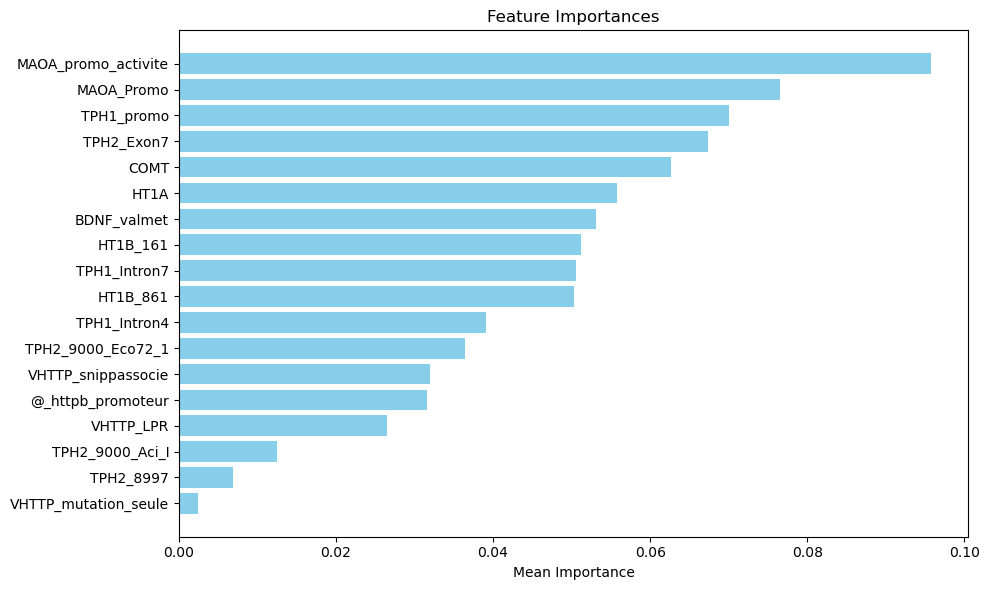

In [23]:
import matplotlib.pyplot as plt

# Extract sorted feature names and importances
sorted_feature_names = [feature[0] for feature in sorted_importance]
sorted_importances = [feature[1] for feature in sorted_importance]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Mean Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the most important at the top
plt.tight_layout()
plt.show()


In [24]:
subset = dfi.copy()
encoder_dict = {}
le = LabelEncoder()
# Encode selected columns
for column in features:
    le = LabelEncoder()
    subset[column] = le.fit_transform(dfi[column])
    encoder_dict[column] = le  # Store the encoder for later use


subset = pd.DataFrame(subset, columns=subset.columns)

In [25]:
subset.drop("type", axis=1, inplace=True)

In [26]:


X = subset.drop('Suicidal_behavior', axis=1)
Y = subset['Suicidal_behavior'].values
#X = data.drop('Y', axis=1)
y = subset['Suicidal_behavior']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Assuming X_train and y_train are your training data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Calculate permutation importances
perm_importance = permutation_importance(rf, X_train, y_train, n_repeats=30, random_state=42)

# Get mean importance and feature names
mean_importance = perm_importance['importances_mean']
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Create a dictionary to map feature names to their importance
importance_dict = {feature_name: importance for feature_name, importance in zip(feature_names, mean_importance)}

# Sort features by importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or access feature importances sorted by importance
for feature, importance in sorted_importance:
    print(f"Feature: {feature}, Mean Importance: {importance}")


Feature: MAOA_promo_activite, Mean Importance: 0.30852321349208683
Feature: TPH2_Exon7, Mean Importance: 0.2754462211757812
Feature: TPH1_promo, Mean Importance: 0.25351551598193944
Feature: MAOA_Promo, Mean Importance: 0.2275816877623229
Feature: COMT, Mean Importance: 0.21884790271586535
Feature: HT1A, Mean Importance: 0.20212548199638827
Feature: BDNF_valmet, Mean Importance: 0.19397911951332353
Feature: VHTTP_snippassocie, Mean Importance: 0.19270452740289526
Feature: HT1B_161, Mean Importance: 0.17535507317939242
Feature: HT1B_861, Mean Importance: 0.16901783750377605
Feature: TPH1_Intron7, Mean Importance: 0.16501498692816818
Feature: TPH1_Intron4, Mean Importance: 0.1442010015332914
Feature: @_httpb_promoteur, Mean Importance: 0.1434424294641919
Feature: TPH2_9000_Eco72_1, Mean Importance: 0.13805189053447636
Feature: VHTTP_LPR, Mean Importance: 0.10232570088917743
Feature: TPH2_9000_Aci_I, Mean Importance: 0.04371104896924162
Feature: VHTTP_mutation_seule, Mean Importance: 0.02

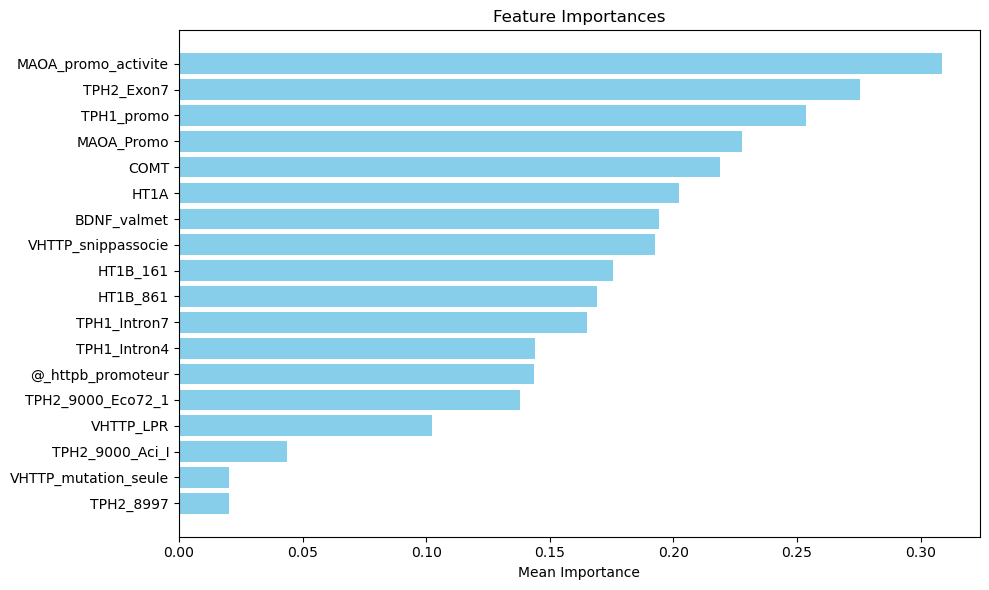

In [29]:
import matplotlib.pyplot as plt

# Extract sorted feature names and importances
sorted_feature_names = [feature[0] for feature in sorted_importance]
sorted_importances = [feature[1] for feature in sorted_importance]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Mean Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the most important at the top
plt.tight_layout()
plt.show()
